In [8]:
# Import statements
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import urllib.request # to import images from dataset
import sys

from sklearn.model_selection import train_test_split


In [9]:
# Import Neural Network and PyTorch Libraries
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as f
import torch.optim as optim

import torchvision
from torchvision.transforms import v2
from torchvision import models
from torchvision.models import resnet50, ResNet50_Weights
import torch.optim.lr_scheduler as lr_scheduler

import random
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Using GPU.")
else:
    device = torch.device('cpu')
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


In [25]:
df = pd.read_csv('/kaggle/working/my_dataframe_part5.csv', sep='\t', encoding="utf-8")


In [ ]:
df = pd.read_csv('/kaggle/working/my_dataframe_part5.csv')

In [26]:
df.shape

(10000, 13)

In [19]:
##Cleaning the dataset
df.drop(['2_way_label', '3_way_label', 'title'], axis = 1, inplace =True)

KeyError: "['2_way_label', '3_way_label', 'title'] not found in axis"

In [27]:
df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,upvote_ratio,6_way_label
0,NaN,this church looks like a duck,1.551744e+09,i.redd.it,True,axeba3,https://preview.redd.it/4si1ayf24pu01.jpg?widt...,NaN,0.0,13,pareidolia,0.84,2
1,flappytowel,premier lake bc,1.433155e+09,i.imgur.com,True,382e1g,https://external-preview.redd.it/ESPM-tTuK3wer...,NaN,0.0,143,pic,0.92,0
2,TKSIX,apparently berocca turns breast milk radioactive,1.561988e+09,i.imgur.com,True,c7sn0s,https://external-preview.redd.it/P9e6E8IYGyRHb...,NaN,10.0,3,mildlyinteresting,0.67,0
3,ApiContraption,other discussions,1.391539e+09,NaN,True,cf6xsez,http://i.imgur.com/mhFO4hK%2ejpg,1x07b0,NaN,1,psbattle_artwork,NaN,4
4,phvar28,king arthur defending the great kingdom of cam...,1.526505e+09,i.redd.it,True,8jym4w,https://preview.redd.it/n2wov2p1bay01.jpg?widt...,NaN,3.0,152,fakehistoryporn,0.98,2
5,ManiaforBeatles,venice priest proposes decency tax on brides w...,1.536145e+09,telegraph.co.uk,True,9d5dwo,https://external-preview.redd.it/tDmmBBL91M2Ke...,NaN,62.0,315,nottheonion,0.93,0
6,sisyphushaditsoeasy,cocacola grants permission to two men in beaum...,1.504615e+09,northjersey.com,True,6y7pk6,https://external-preview.redd.it/m7LnrjP_xxHga...,NaN,1108.0,36733,upliftingnews,0.86,0
7,GreenEyedFreak714,this skanking pickle,1.556777e+09,i.redd.it,True,bjrjo9,https://preview.redd.it/7l0yacumnqv21.jpg?widt...,NaN,0.0,9,pareidolia,1.00,2
8,heyguysitsjustin,the shell of this snail kinda looks like an ai...,1.570315e+09,i.redd.it,True,ddugpj,https://preview.redd.it/my4x70euusq31.jpg?widt...,NaN,6.0,9,mildlyinteresting,0.85,0
9,Spekulatius2410,a megasolar initiative will help southern afri...,1.568125e+09,weforum.org,True,d28206,https://external-preview.redd.it/Wk383UrAX3t9f...,NaN,7.0,48,upliftingnews,0.88,0


In [21]:
df.shape

(10000, 1)

In [28]:
df['clean_title']

0                           this church looks like a duck
1                                         premier lake bc
2        apparently berocca turns breast milk radioactive
3                                       other discussions
4       king arthur defending the great kingdom of cam...
                              ...                        
9995    a nearly braindead woman survives after being ...
9996                                            like this
9997    sean combs formerly known as puff daddy set to...
9998                      the sky was dabbing on me today
9999    found this guy after moving my shower caddy of...
Name: clean_title, Length: 10000, dtype: object

In [10]:
import os
import pandas as pd

# 1. Load your original dataframe (if not already)
# df = pd.read_csv("your_file.csv")  # if needed

# 2. List all image filenames 
image_dir = "/kaggle/input/fakeddit-50k/fakeddit_small_img"
downloaded_image_ids = {
    os.path.splitext(filename)[0] for filename in os.listdir(image_dir)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png'))
}

# 3. Filter rows where image_id is in downloaded images

filtered_df = df[df['id'].isin(downloaded_image_ids)].reset_index(drop=True)


In [11]:

filtered_df.shape

(50000, 13)

In [29]:
df, df_backup = train_test_split(
    filtered_df ,
    test_size=0.2,
    shuffle=True,
    # To maintain percentage of samples per class as given by original dataset
    stratify=filtered_df["6_way_label"]
)

In [30]:
df.shape

(40000, 13)

In [14]:
# Reset indexes as we are now working with a smaller sample of original dataset
df.reset_index(drop=True, inplace=True)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,upvote_ratio,6_way_label
0,BradRomance,americas best dance sloth,1.381461e+09,NaN,True,ccpchtz,http://i.imgur.com/iDGou0h.jpg,1o6xa5,NaN,6,psbattle_artwork,NaN,4
1,ApiContraption,other discussions,1.379309e+09,NaN,True,cc99nip,http://i.imgur.com/58LeLE5%2ejpg,1mhefs,NaN,1,psbattle_artwork,NaN,4
2,Myschly,also follow me on twitter instagram and please...,1.406920e+09,NaN,True,cje832m,http://i.imgur.com/Ln7pbMB.jpg,2cavit,NaN,-1,psbattle_artwork,NaN,4
3,DaminDrexil,care to spare a few minute to talk about jesus...,1.350813e+09,NaN,True,c6pm93y,http://i.imgur.com/wNrR9.jpg,11u5ml,NaN,520,psbattle_artwork,NaN,4
4,domdomburg,vladimir putin clapping,1.486349e+09,i.imgur.com,True,5sbmnk,https://external-preview.redd.it/RLdCllAebCKTr...,NaN,4.0,8,photoshopbattles,0.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,PhotoshopperTPL,zooming through space,1.561360e+09,NaN,True,erwwwr6,https://i.imgur.com/5lDs2X7.jpg,c47rn5,NaN,1,psbattle_artwork,NaN,4
27496,Gabadaddy,couldnt find numbers i liked so made my own ho...,1.562450e+09,i.redd.it,True,c9z4bw,https://preview.redd.it/8iccr4ob7r831.jpg?widt...,NaN,11.0,32,mildlyinteresting,0.77,0
27497,3R1CA,wait this chick looks suspiciously familiar,1.425940e+09,NaN,True,cp9lut2,http://i.imgur.com/6JqojwV.jpg,2yg088,NaN,3,psbattle_artwork,NaN,4
27498,NaN,do the limbo,1.416158e+09,NaN,True,cm456iw,http://i.imgur.com/Gh6ojHF.jpg,2mgayn,NaN,7,psbattle_artwork,NaN,4


In [1]:
print(df['clean_title'].isnull().sum())
print(df['id'].isnull().sum())
print(df['hasImage'].isnull().sum())

# Check for how many rows the column hasImage would be False
print(df['hasImage'].value_counts())

NameError: name 'df' is not defined

<Axes: title={'center': '6_way_label'}, ylabel='Frequency'>

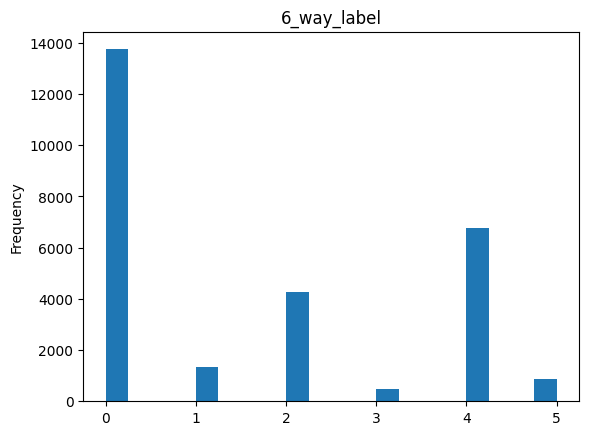

In [16]:
from matplotlib import pyplot as plt
df['6_way_label'].plot(kind='hist', bins=20, title='6_way_label')

Downloaded all images.


(567, 891, 3)


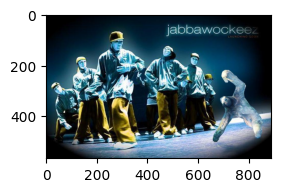

(640, 960, 3)


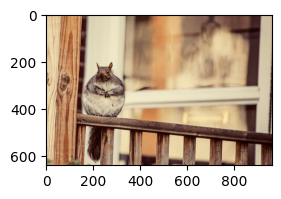

(2448, 1836, 3)


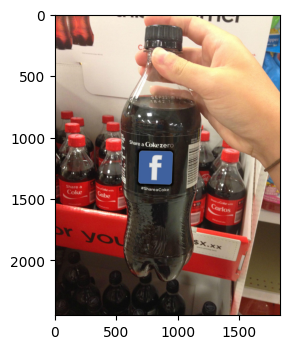

(1360, 2048, 3)


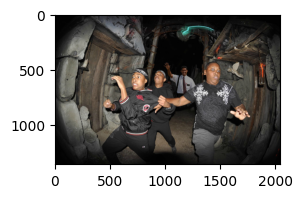

(232, 320, 3)


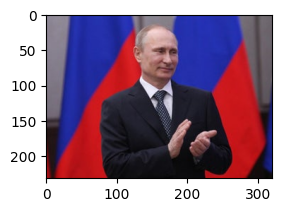

In [ ]:
# Plotting images to test download
for i in range(5):
    path = "/kaggle/input/fakeddit-50k/fakeddit_small_img/" + df["id"][i] + ".jpg"

    im= np.array(Image.open(path))

    print(im.shape)
    ax= plt.subplot(121)
    ax.imshow(im)

    plt.show()

In [17]:
import shutil

# Source path in Kaggle
kaggle_path = "/kaggle/input/fakeddit-50k/fakeddit_small_img/ccpchtz.jpg"

# Destination path in the output folder (which you can download)
output_path = "/kaggle/working/ccpchtz.jpg"

# Copy image to working directory
shutil.copy(kaggle_path, output_path)

'/kaggle/working/ccpchtz.jpg'

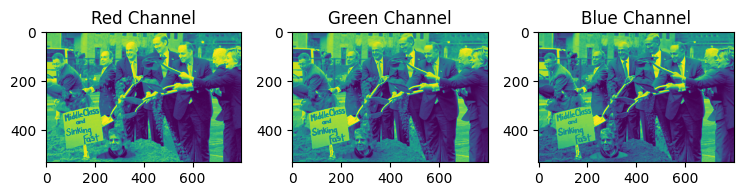

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGBA image
image_path = "/kaggle/input/fakeddit-50k/fakeddit_small_img/" + df["id"][0] + ".jpg"
image = Image.open(image_path).convert("RGB")

# Split the image into individual channels
r, g, b = image.split()

# Plot each channel separately
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(r)
plt.title('Red Channel')

plt.subplot(1, 4, 2)
plt.imshow(g)
plt.title('Green Channel')

plt.subplot(1, 4, 3)
plt.imshow(b)
plt.title('Blue Channel')

#plt.subplot(1, 4, 4)
#plt.imshow(a)
#plt.title('Alpha Channel')

plt.tight_layout()
plt.show()


In [19]:
def validate_images(directory):
    corrupted_files = []

    # Walk through directory and sub-directories
    for index, row in df.iterrows():
      image_path = "/kaggle/input/fakeddit-50k/fakeddit_small_img/" + row["id"] + ".jpg"
      try:
          with Image.open(image_path) as img:
              img.verify()
      except Exception as e:
          corrupted_files.append(image_path)
          print(f"Error with {image_path}: {e}")
          df.drop(index = index, axis = 0, inplace = True)

    return corrupted_files

# Example usage:
directory = "/kaggle/input/fakeddit-50k/fakeddit_small_img/"
corrupted_images = validate_images(directory)
if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images.")
else:
    print("All images are valid!")
df.reset_index(drop=True, inplace=True)

Error with /kaggle/input/fakeddit-50k/fakeddit_small_img/c50lt7l.jpg: cannot identify image file '/kaggle/input/fakeddit-50k/fakeddit_small_img/c50lt7l.jpg'
Error with /kaggle/input/fakeddit-50k/fakeddit_small_img/d1vnfe7.jpg: cannot identify image file '/kaggle/input/fakeddit-50k/fakeddit_small_img/d1vnfe7.jpg'
Error with /kaggle/input/fakeddit-50k/fakeddit_small_img/ekthxbz.jpg: cannot identify image file '/kaggle/input/fakeddit-50k/fakeddit_small_img/ekthxbz.jpg'
Error with /kaggle/input/fakeddit-50k/fakeddit_small_img/dgd7lo5.jpg: cannot identify image file '/kaggle/input/fakeddit-50k/fakeddit_small_img/dgd7lo5.jpg'
Error with /kaggle/input/fakeddit-50k/fakeddit_small_img/ddn2mdb.jpg: cannot identify image file '/kaggle/input/fakeddit-50k/fakeddit_small_img/ddn2mdb.jpg'
Error with /kaggle/input/fakeddit-50k/fakeddit_small_img/d74r9nu.jpg: cannot identify image file '/kaggle/input/fakeddit-50k/fakeddit_small_img/d74r9nu.jpg'
Error with /kaggle/input/fakeddit-50k/fakeddit_small_img/c

In [20]:
df.shape

(27483, 13)

In [31]:
import os
from PIL import Image
from torchvision import transforms as v2

# Define the desired size
new_size = (256, 256)

# Create a folder to save resized images
save_dir = "/kaggle/working/resized_images"
os.makedirs(save_dir, exist_ok=True)

# Resize and save each image
for index, row in df.iterrows():
    image_id = row["id"]
    image_path = f"/kaggle/input/fakeddit-50k/fakeddit_small_img/{image_id}.jpg"

    try:
        image = Image.open(image_path).convert("RGB")
        resize_transform = v2.Resize(new_size)
        resized_image = resize_transform(image)

        # Save to working directory
        save_path = os.path.join(save_dir, f"{image_id}.jpg")
        resized_image.save(save_path)
    except Exception as e:
        print(f"Error processing {image_id}: {e}")


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
##Already have images in working directory
import os
import pandas as pd

# 1. Load your original dataframe (if not already)
# df = pd.read_csv("your_file.csv")  # if needed

# 2. List all image filenames 
image_dir = "/kaggle/working/resized_images"
downloaded_image_ids = {
    os.path.splitext(filename)[0] for filename in os.listdir(image_dir)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png'))
}

# 3. Filter rows where image_id is in downloaded images

filtered_df = df[df['id'].isin(downloaded_image_ids)].reset_index(drop=True)

In [27]:
## same files
df, df_backup = train_test_split(
    filtered_df ,
    test_size=0.3,
    shuffle=True,
    # To maintain percentage of samples per class as given by original dataset
    stratify=filtered_df["6_way_label"]
)

In [30]:
# Reset indexes as we are now working with a smaller sample of original dataset
df.reset_index(drop=True, inplace=True)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,SoulstormYT,saw this on my local bus today,1.565151e+09,i.redd.it,True,cn0zz2,https://preview.redd.it/47s8ehefcye31.jpg?widt...,NaN,4.0,24,mildlyinteresting,Saw this on my local bus today,0.85,1,0,0
1,Gurpy_Hurpy69420,this tree has absorbed a fence while growing,1.569198e+09,i.redd.it,True,d7yxnx,https://preview.redd.it/e3vml4jfm8o31.jpg?widt...,NaN,2.0,15,mildlyinteresting,This tree has absorbed a fence while growing,0.81,1,0,0
2,sporkasoris,paint me like one of your french girls,1.350348e+09,NaN,True,c6n0u80,http://i.imgur.com/pdyI5.jpg,11igmi,NaN,31,psbattle_artwork,Paint me like one of your french girls...,NaN,0,2,4
3,dannylenwinn,authorities make largest cocaine seizure at ny...,1.552338e+09,nbcnews.com,True,azymxl,https://external-preview.redd.it/_sOLyFJDNCckC...,NaN,5.0,31,usnews,Authorities make largest cocaine seizure at N....,0.91,1,0,0
4,Gaston44,gay man forced to go to prostitute or lose job,1.421331e+09,thelocal.it,True,2sik8o,https://external-preview.redd.it/U0lDjaoIh2j9S...,NaN,0.0,6,nottheonion,Gay man forced to go to prostitute or lose job,0.80,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18637,flacid_pianist,this creepy crawling cat,1.426274e+09,i.imgur.com,True,2yxvbq,https://external-preview.redd.it/OrI0wZB0UiYcH...,NaN,65.0,1023,photoshopbattles,PsBattle: This Creepy Crawling Cat,0.88,1,0,0
18638,maddkid53,hes seen some things,1.363188e+09,i.imgur.com,True,1a7vjx,https://external-preview.redd.it/ESPM-tTuK3wer...,NaN,1.0,13,pareidolia,He's seen some things.,0.81,0,2,2
18639,ceoxal,image of the first recording of the episode of...,1.516597e+09,i.redd.it,True,7s3g4j,https://preview.redd.it/iolqvdrcvjb01.jpg?widt...,NaN,1.0,14,fakehistoryporn,Image of the first recording of the episode of...,0.94,0,2,2
18640,jcbouche,to arms,1.364501e+09,NaN,True,c9471hz,http://i.imgur.com/BFRktjd.jpg,1b68xn,NaN,204,psbattle_artwork,To arms!,NaN,0,2,4


(256, 256, 3)


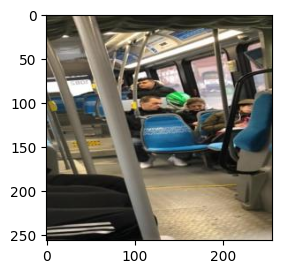

(256, 256, 3)


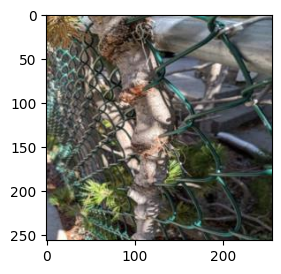

(256, 256, 3)


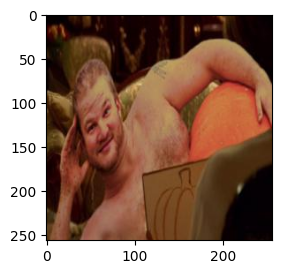

(256, 256, 3)


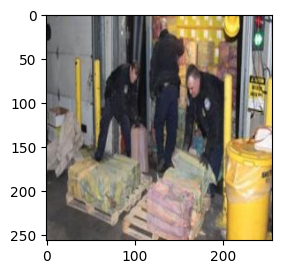

(256, 256, 3)


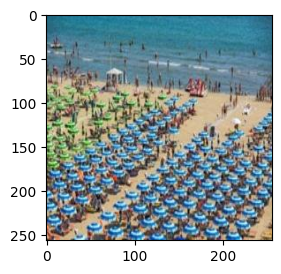

In [31]:
# Plotting images to test resize
for i in range(5):
    path = "/kaggle/working/resized_images/" + df["id"][i] + ".jpg"

    im= np.array(Image.open(path))

    print(im.shape)
    ax= plt.subplot(121)
    ax.imshow(im)

    plt.show()

In [32]:
import os

# Path to your image directory
image_dir = '/kaggle/working/resized_images'

# Count number of .jpg files
image_count = len([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

print(f"Total number of images: {image_count}")


Total number of images: 26632


In [39]:
%%capture

#Instsalling BERT and PyTorch into Colab

! pip install bert-serving-server  # server-side
! pip install bert-serving-client  # client-side
! pip install torch transformers

In [33]:
import torch
from transformers import BertModel, BertTokenizer

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name, output_hidden_states = True)

# Put the model in evaluation mode, which turns off dropout regularization which is used in training.
bert_model.eval()

2025-04-19 10:12:06.543133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745057526.560299     164 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745057526.565401     164 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [34]:
def get_bert_embedding(text):
    # Tokenize input text and get token IDs and attention mask
    inputs = tokenizer.encode_plus(text, add_special_tokens = True, return_tensors='pt', max_length=80, truncation=True, padding='max_length')

    return inputs['input_ids'].squeeze(0), inputs['attention_mask'].squeeze(0)

# Testing embedding
text = "This is an example Reddit submission title."
input_ids, attention_mask = get_bert_embedding(text)
print(input_ids.shape)
print(attention_mask.shape)
# print(embedding)

torch.Size([80])
torch.Size([80])


In [35]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["6_way_label"])
df_test, df_val = train_test_split(df_test, test_size=0.5, stratify=df_test["6_way_label"])

In [36]:
print(f"df_train->{df_train.shape} df_test={df_test.shape} df_val={df_val.shape}")

df_train->(14913, 16) df_test=(1864, 16) df_val=(1865, 16)


In [37]:
class FakedditDataset(Dataset):
    def __init__(self, df, text_field="clean_title", label_field="6_way_label", image_id="id"):
        self.df = df.reset_index(drop=True)
        self.text_field = text_field
        self.label_field = label_field
        self.image_id = image_id

        self.img_size = 256
        # Using the pre-calculated ImageNet mean and std values for normalization
        self.mean, self.std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

        self.transform_func = v2.Compose(
                [   v2.Resize(256),
                    v2.ToTensor(),
                    
                    v2.Normalize(self.mean, self.std)
                    ])

    def __getitem__(self, index):
        text = str(self.df.at[index, self.text_field])
        label = self.df.at[index, self.label_field]
        img_path = "/kaggle/working/resized_images/" + self.df.at[index, self.image_id] + ".jpg"

        image = Image.open(img_path)
        img = self.transform_func(image)

        input_ids, attention_mask = get_bert_embedding(text)

        return input_ids, attention_mask, label, img

    def __len__(self):
        return self.df.shape[0]


In [38]:
!pip show torchvision

Name: torchvision
Version: 0.20.1+cu124
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, pillow, torch
Required-by: easyocr, fastai, timm


In [39]:
train_dataset = FakedditDataset(df_train)
test_dataset = FakedditDataset(df_test)
val_dataset = FakedditDataset(df_val)

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [40]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)

print(len(train_loader))

# Verifying dataset was created accurately
input_ids, attention_mask, label, img = next(iter(train_loader))
print(input_ids.shape, attention_mask.shape, label.shape, img.shape)

1865
torch.Size([8, 80]) torch.Size([8, 80]) torch.Size([8]) torch.Size([8, 3, 256, 256])


In [51]:
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0


In [42]:
labels = df_train['6_way_label'].to_numpy()

In [ ]:
import torch
from sklearn.utils.class_weight import compute_class_weight

# Assuming 'labels' is a list of all labels in the dataset
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, save_dir='./model_checkpoints'):
    early_stopping = EarlyStopping(patience=5, verbose=True)
    
    # Create directory for saving models if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for input_ids, attention_mask, label, img in train_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            label = label.to(device)
            img = img.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(img, input_ids, attention_mask)
            loss = criterion(outputs, label)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * img.size(0)

        # Validating model and ensuring loss is decreasing     
        model.eval()
        val_loss = 0.0
        correct_preds = 0
        with torch.no_grad():
            for input_ids, attention_mask, label, img in val_loader:
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                label = label.to(device)
                img = img.to(device)

                outputs = model(img, input_ids, attention_mask)
                loss = criterion(outputs, label)
                val_loss += loss.item() * img.size(0)

                _, preds = torch.max(outputs, 1)
                correct_preds += torch.sum(preds == label)

        val_loss = val_loss / len(val_loader.dataset)
        accuracy = correct_preds.double() / len(val_loader.dataset)
        scheduler.step(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss/len(train_loader.dataset):.4f}, Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')

        # Early stopping
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered. Stopping training.")
            break

        # Save model after every 2 epochs
        if (epoch + 1) % 2 == 0:
            checkpoint_path = f"{save_dir}/model_epoch_{epoch+1}.pth"
            torch.save(model.state_dict(), checkpoint_path)
            print(f"Model saved at {checkpoint_path}")


In [47]:
from sklearn.metrics import precision_score, recall_score

def evaluate_model(model, test_loader, criterion):
    model.eval()
    val_losses = []
    correct_preds = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for input_ids, attention_mask, label, img in test_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            label = label.to(device)
            img = img.to(device)

            outputs = model(
                  image = img,
                  text_input_ids = input_ids,
                  text_attention_mask = attention_mask
            )

            # Final Softmax layer returns class predictions per sample in batch
            # Highest probability value resembles class prediction and is assigned to preds variable
            _, preds = torch.max(outputs, dim=1)
            #print(outputs)

            # Loss is calculated by applying Cross Entropy Loss
            val_loss = criterion(outputs, label)

            # Counting correct model predictions and incrementing correct prediction count
            correct_preds += torch.sum(preds == label)
            print(preds, label)

            # Appending current loss per batch to list of losses per epoch
            val_losses.append(val_loss.item())
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(label.cpu().numpy())
            

    accuracy = float((correct_preds.double() / len(df_test)) * 100)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')

    print("\nAccuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)

In [48]:
class BERTResNetClassifier(nn.Module):
    def __init__(self, num_classes=6):

        super(BERTResNetClassifier, self).__init__()

        self.num_classes = num_classes

        # Image processing (ResNet)
        self.image_model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

        # Image processing (Fully Connected Layer)
        self.fc_image = nn.Linear(in_features=1000, out_features=num_classes, bias=True)

        # Dropout layer
        self.drop = nn.Dropout(p=0.3)

        # Text processing (using the 768-dimensional BERT arrays)
        self.text_model = BertModel.from_pretrained("bert-base-uncased")

        # Text processing (Fully Connected Layer)
        self.fc_text = nn.Linear(in_features=self.text_model.config.hidden_size, out_features=num_classes, bias=True)

        # Fusion and classification
        self.softmax = nn.Softmax(dim=1)

    def forward(self, image, text_input_ids, text_attention_mask,):
        # Image branch
        x_img = self.image_model(image)
        x_img = self.drop(x_img)
        x_img = self.fc_image(x_img)

        # Text branch
        x_text_last_hidden_states = self.text_model(
            input_ids = text_input_ids,
            attention_mask = text_attention_mask,
            return_dict=False
        )
        x_text_pooled_output = x_text_last_hidden_states[0][:, 0, :]
        x_text = self.drop(x_text_pooled_output)
        x_text = self.fc_text(x_text_pooled_output)

        # Fusion and max merge
        x = torch.max(x_text, x_img)

        # Classification
        #x = self.softmax(x) #-> already applied in crossentropy loss

        return x


In [49]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = BERTResNetClassifier(num_classes=6)
model= model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, min_lr=1e-6, factor=0.5, patience=1, verbose=True)
num_epochs = 20

In [52]:
train_model(model, train_loader,val_loader, criterion, optimizer, scheduler, num_epochs,save_dir='./model_checkpoints')
#print("\n")
evaluate_model(model, test_loader, criterion)


Epoch 1/20, Training Loss: 0.0399, Validation Loss: 1.5820, Accuracy: 0.8011
Epoch 2/20, Training Loss: 0.0290, Validation Loss: 1.5992, Accuracy: 0.8097
EarlyStopping counter: 1 out of 5
Model saved at ./model_checkpoints/model_epoch_2.pth
Epoch 3/20, Training Loss: 0.0249, Validation Loss: 1.7314, Accuracy: 0.8064
EarlyStopping counter: 2 out of 5
Epoch 4/20, Training Loss: 0.0221, Validation Loss: 1.6114, Accuracy: 0.8005
EarlyStopping counter: 3 out of 5
Model saved at ./model_checkpoints/model_epoch_4.pth
Epoch 5/20, Training Loss: 0.0189, Validation Loss: 1.6724, Accuracy: 0.8080
EarlyStopping counter: 4 out of 5
Epoch 6/20, Training Loss: 0.0176, Validation Loss: 1.7196, Accuracy: 0.8038
EarlyStopping counter: 5 out of 5
Early stopping triggered. Stopping training.
tensor([4, 4, 0, 2, 4, 0, 4, 2], device='cuda:0') tensor([4, 4, 0, 2, 2, 0, 4, 2], device='cuda:0')
tensor([0, 0, 4, 0, 4, 2, 0, 0], device='cuda:0') tensor([0, 0, 4, 0, 4, 1, 0, 0], device='cuda:0')
tensor([4, 0, 4, 

In [54]:
torch.save(model.state_dict(), "modellast.pth")

In [ ]:
## preds
# Example: Single input
text = "saw this on my local bus today"
image_path = "./kaggle/working/resized_images/cn0zz2.jpg"

# Tokenize and preprocess the text
input_ids, attention_mask = get_bert_embedding(text)  # Assuming `get_bert_embedding` is your function

# Preprocess the image
img = Image.open(image_path)
img = transform(img)  # Apply the same transformations as in the training phase
img = img.unsqueeze(0)  # Add a batch dimension (make it (1, C, H, W))

# Send the inputs to the same device as the model (CPU/GPU)
input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)
img = img.to(device)

In [55]:
df.head(

)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,SoulstormYT,saw this on my local bus today,1.565151e+09,i.redd.it,True,cn0zz2,https://preview.redd.it/47s8ehefcye31.jpg?widt...,NaN,4.0,24,mildlyinteresting,Saw this on my local bus today,0.85,1,0,0
1,Gurpy_Hurpy69420,this tree has absorbed a fence while growing,1.569198e+09,i.redd.it,True,d7yxnx,https://preview.redd.it/e3vml4jfm8o31.jpg?widt...,NaN,2.0,15,mildlyinteresting,This tree has absorbed a fence while growing,0.81,1,0,0
2,sporkasoris,paint me like one of your french girls,1.350348e+09,NaN,True,c6n0u80,http://i.imgur.com/pdyI5.jpg,11igmi,NaN,31,psbattle_artwork,Paint me like one of your french girls...,NaN,0,2,4
3,dannylenwinn,authorities make largest cocaine seizure at ny...,1.552338e+09,nbcnews.com,True,azymxl,https://external-preview.redd.it/_sOLyFJDNCckC...,NaN,5.0,31,usnews,Authorities make largest cocaine seizure at N....,0.91,1,0,0
4,Gaston44,gay man forced to go to prostitute or lose job,1.421331e+09,thelocal.it,True,2sik8o,https://external-preview.redd.it/U0lDjaoIh2j9S...,NaN,0.0,6,nottheonion,Gay man forced to go to prostitute or lose job,0.80,1,0,0


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the image
image_path = './kaggle/working/resized_images/cn0zz2.jpg'

# Open the image
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Code to split 50k data into 5parts

In [10]:
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # if using CUDA
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [11]:
df = pd.read_csv('/kaggle/input/fakeddit-dataset/multimodal_only_samples/multimodal_train.tsv', sep='\t')

In [12]:
df.shape

(564000, 16)

In [13]:
##Cleaning the dataset
df.drop(['2_way_label', '3_way_label', 'title'], axis = 1, inplace =True)

In [14]:
## Adjusting df to have only those files for which we have images

import os
import pandas as pd

# 1. Load your original dataframe (if not already)
# df = pd.read_csv("your_file.csv")  # if needed

# 2. List all image filenames 
image_dir = "/kaggle/input/fakeddit-50k/fakeddit_small_img"
downloaded_image_ids = {
    os.path.splitext(filename)[0] for filename in os.listdir(image_dir)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png'))
}

# 3. Filter rows where image_id is in downloaded images

filtered_df = df[df['id'].isin(downloaded_image_ids)].reset_index(drop=True)


In [15]:
filtered_df.shape

(50000, 13)

In [16]:
filtered_df.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,upvote_ratio,6_way_label
0,happenpupe,major thermos,1.495660e+09,i.redd.it,True,6d50rl,https://preview.redd.it/l9gvkkf3jizy.jpg?width...,NaN,0.0,2,pareidolia,0.67,2
1,nyswagggggggg,rabbi meat from cloned pig could be kosher for...,1.521729e+09,timesofisrael.com,True,86byl8,https://external-preview.redd.it/KHisCPOGwz7cz...,NaN,577.0,6769,nottheonion,0.92,0
2,unenlightenedfool,seven doggly sins sloth,1.537025e+09,i.redd.it,True,9g2b4h,https://preview.redd.it/nnpo51sr7fm11.png?widt...,NaN,0.0,8,fakealbumcovers,0.90,1
3,Nukemarine,asian girl wearing virtual reality goggles hol...,1.406995e+09,i.imgur.com,True,2cfi7g,https://external-preview.redd.it/YaUkMGsRbz5qu...,NaN,19.0,137,photoshopbattles,0.89,0
4,mario61752,rain made this iron slab wall a beautiful red,1.553983e+09,i.redd.it,True,b7gj1e,https://preview.redd.it/dpo9t9hzvbp21.jpg?widt...,NaN,3.0,27,mildlyinteresting,0.87,0


In [17]:
##saving df
# Example: Saving as CSV
filtered_df.to_csv('my_dataframe.csv', index=False)

In [18]:
##Splitting into 5 parts
import numpy as np

# Number of splits
num_splits = 5

# Split the DataFrame
split_dfs = np.array_split(filtered_df, num_splits)

# Save each split to a separate CSV
for i, df_part in enumerate(split_dfs):
    df_part.to_csv(f'my_dataframe_part{i+1}.csv', index=False)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [19]:
df1=pd.read_csv("/kaggle/working/my_dataframe_part5.csv")

In [21]:
df1.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,upvote_ratio,6_way_label
0,NaN,this church looks like a duck,1.551744e+09,i.redd.it,True,axeba3,https://preview.redd.it/4si1ayf24pu01.jpg?widt...,NaN,0.0,13,pareidolia,0.84,2
1,flappytowel,premier lake bc,1.433155e+09,i.imgur.com,True,382e1g,https://external-preview.redd.it/ESPM-tTuK3wer...,NaN,0.0,143,pic,0.92,0
2,TKSIX,apparently berocca turns breast milk radioactive,1.561988e+09,i.imgur.com,True,c7sn0s,https://external-preview.redd.it/P9e6E8IYGyRHb...,NaN,10.0,3,mildlyinteresting,0.67,0
3,ApiContraption,other discussions,1.391539e+09,NaN,True,cf6xsez,http://i.imgur.com/mhFO4hK%2ejpg,1x07b0,NaN,1,psbattle_artwork,NaN,4
4,phvar28,king arthur defending the great kingdom of cam...,1.526505e+09,i.redd.it,True,8jym4w,https://preview.redd.it/n2wov2p1bay01.jpg?widt...,NaN,3.0,152,fakehistoryporn,0.98,2


# 